# Procena darovitosti učenika

U ranijim analizama i izveštaju prikazana je priroda podataka iz ovog dataseta, s toga će se ova sveska baviti isključivo strategijama identifikacije anomalija. U nastavku će biti navedeni neki od popularnih pristupa ovom problemu. Izabrani algoritmi biće primenjeni nad podacima, a zatim ćemo probati da što bolje razumemo rezultate odnosno otkrivene anomalije.

Za početak učitavamo osnovne module, podešavamo okruženje i sređujemo osnovni dataset.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np

In [4]:
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 20)

In [5]:
df = pd.read_excel('data/data Procena darovitosti.xlsx', sheet_name='Sheet1')

In [6]:
df.head()

,RB,naspol,nasss,nastrs,nasvl,naslm,nasvp,nastk,nasmr,nasinter,nasintra,naspriro,nastfil,rodss,rodpol,rodvl,rodlm,rodvp,rodtk,rodmr,rodintr,rodintra,rodprir,rodfil,vrspol,vrsray,vrsvl,vrslm,vrsvp,vrstk,vrsmr,vrsintr,vrsintra,vrsprir,vrsfil,ucepol,ucenraz,ucevl,ucelm,ucevp,ucetk,ucemr,uceinter,uceintra,ucepriro,ucefil,rpm,vs,shv,Rnasvl
0,1,1,3,2,44,33,55,48,57,55,49,32,38,1,1,49,44,60,50,57,60,56,32,46,1,2,54,45,53,48,56,60,62,46,53,1,2,44,39,54,42,55,49,54,40,39,30,13,17,10.0
1,2,1,3,2,50,40,44,42,38,60,59,38,37,1,2,46,57,50,44,28,67,65,40,33,1,2,46,49,52,43,42,68,65,47,37,1,2,45,42,45,37,36,65,63,44,33,36,12,16,30.0
2,3,1,3,2,42,42,36,43,40,56,34,33,29,1,1,41,34,27,44,38,50,50,31,39,1,2,44,44,40,48,45,60,67,35,36,2,2,36,31,24,36,34,45,37,29,25,36,13,16,6.0
3,4,1,3,1,50,60,32,28,34,46,52,47,48,1,1,52,49,50,48,45,49,51,52,29,2,1,55,59,54,42,55,64,68,48,54,2,1,52,44,47,55,60,45,45,51,37,31,12,10,30.0
4,5,1,3,1,46,45,43,61,53,51,56,39,52,1,2,40,38,44,58,44,58,61,36,37,1,1,51,44,43,58,51,63,58,55,41,2,1,54,41,37,54,41,52,57,51,46,33,5,13,15.0


In [7]:
df.set_index('RB', inplace=True)

In [8]:
df.rename(columns={'nastfil': 'nasfil', 
                   "nasinter": "nasintr", 
                   "naspriro": "nasprir", 
                   "uceinter": "uceintr", 
                   "ucepriro": "uceprir"}, inplace=True)

In [9]:
df.describe()

,naspol,nasss,nastrs,nasvl,naslm,nasvp,nastk,nasmr,nasintr,nasintra,nasprir,nasfil,rodss,rodpol,rodvl,rodlm,rodvp,rodtk,rodmr,rodintr,rodintra,rodprir,rodfil,vrspol,vrsray,vrsvl,vrslm,vrsvp,vrstk,vrsmr,vrsintr,vrsintra,vrsprir,vrsfil,ucepol,ucenraz,ucevl,ucelm,ucevp,ucetk,ucemr,uceintr,uceintra,uceprir,ucefil,rpm,vs,shv,Rnasvl
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.158940,2.841060,1.675497,57.033113,57.033113,58.754967,56.066225,54.980132,63.801325,62.152318,49.231788,51.072848,1.754967,1.377483,54.403974,53.629139,56.417219,55.754967,51.774834,62.099338,60.854305,46.450331,47.629139,1.450331,1.476821,57.456954,54.013245,55.662252,54.026490,53.576159,62.635762,62.543046,48.509934,51.125828,1.463576,1.490066,57.403974,56.655629,58.589404,57.344371,55.046358,63.344371,63.668874,52.523179,53.019868,32.231788,9.940397,14.039735,76.000000
std,0.366837,0.448594,0.820972,7.740299,9.427914,9.519080,10.430512,10.436136,9.328823,8.379139,10.126167,10.037330,0.951959,0.486371,7.534082,8.808039,9.256607,8.756687,10.566723,8.552391,8.902732,10.832475,10.604160,0.499183,0.501125,8.058730,10.631392,9.741244,9.829172,9.926018,8.336653,9.532915,11.607967,12.457557,0.500331,0.539970,7.257345,10.108113,9.706542,9.488974,10.563041,8.217904,7.888998,11.488449,12.171809,4.302625,3.774002,2.430036,43.692181
min,1.000000,1.000000,1.000000,31.000000,33.000000,24.000000,5.000000,21.000000,30.000000,34.000000,23.000000,21.000000,1.000000,1.000000,36.000000,24.000000,27.000000,24.000000,25.000000,24.000000,32.000000,17.000000,22.000000,1.000000,1.000000,38.000000,29.000000,31.000000,28.000000,28.000000,33.000000,22.000000,20.000000,17.000000,1.000000,1.000000,36.000000,31.000000,24.000000,21.000000,30.000000,42.000000,37.000000,21.000000,23.000000,11.000000,0.000000,8.000000,1.000000
25%,1.000000,3.000000,1.000000,52.000000,52.000000,55.000000,49.500000,49.500000,60.000000,56.500000,42.000000,46.000000,1.000000,1.000000,49.000000,48.000000,51.000000,50.000000,44.000000,56.500000,56.000000,40.000000,40.000000,1.000000,1.000000,51.000000,46.000000,49.000000,47.000000,47.000000,59.000000,58.000000,40.000000,43.000000,1.000000,1.000000,53.000000,49.000000,53.000000,51.000000,48.000000,59.000000,59.000000,45.000000,45.000000,31.000000,8.000000,12.000000,37.500000
50%,1.000000,3.000000,1.000000,58.000000,58.000000,62.000000,58.000000,56.000000,66.000000,64.000000,49.000000,52.000000,1.000000,1.000000,55.000000,54.000000,57.000000,56.000000,54.000000,63.000000,61.000000,47.000000,47.000000,1.000000,1.000000,58.000000,54.000000,56.000000,55.000000,54.000000,63.000000,64.000000,48.000000,53.000000,1.000000,1.000000,58.000000,58.000000,60.000000,58.000000,56.000000,65.000000,64.000000,53.000000,53.000000,33.000000,10.000000,14.000000,74.500000
75%,1.000000,3.000000,2.000000,63.000000,64.000000,66.000000,64.000000,62.000000,71.000000,68.500000,58.000000,59.000000,3.000000,2.000000,60.000000,59.000000,64.000000,62.000000,60.000000,69.000000,68.000000,54.000000,56.000000,2.000000,2.000000,64.000000,63.000000,63.000000,61.000000,60.000000,68.500000,70.000000,55.500000,60.500000,2.000000,2.000000,62.000000,65.000000,66.000000,63.500000,63.000000,70.000000,70.000000,60.000000,63.000000,35.000000,13.000000,16.000000,113.000000
max,2.000000,3.000000,3.000000,70.000000,73.000000,72.000000,73.000000,75.000000,75.000000,75.000000,72.000000,72.000000,3.000000,2.000000,72.000000,71.000000,73.000000,74.000000,72.000000,75.000000,75.000000,69.000000,71.000000,2.000000,2.00000

Iz deskriptivnih statistika možemo primetiti da su za većinu kolona skale približne, ali da postoje i one koje značajno odstupaju. Zato ćemo pre primene algoritama osetljivih na nenormalizovane podatke svesti sve kolone na istu skalu.

## Strategije detekcije anomalija

U nastavku biće navedene i ukratko objašnjene strategije i algoritmi, a zatim i primenjene na konretnom setu podataka.

### 1. Univarijantne strategije

Ova grupa strategija jeste znatno jednostavnija od naredne. Pri ovom pristupu posmatramo svaki atribut posebno, ne i njihove kombinacije. Možemo probati 2 jako slična pristupa:
1. Identifikacija anomalija na osnovu z-score
2. Identifikacija anomalija na osnovu IQR-a (interkvartalni opseg)

Oba pristupa su dobra samo u slučaju da su varijable normalno raspoređene, a rade loše se `iskošenim` raspodelama. S obzirom da u našem skupu postoji par desno-iskošenih raspodela, ove metode ćemo probati samo kao početnu tačku: postavićemo veliki prag kako bi identifikovali samo one koji imaju znatno veće odstupanje po nekom atributu.

Evo intuicije iza oba pristupa:

#### 1.1. Identifikacija anomalija na osnovu z skora (Z-score based anomaly detection)
Prvi pristup se zasniva na tome da, pod pretpostavkom da je varijabla normalno raspoređena, posmatramo anomalije kao tačke sa najvećim z-score-om (z score = koliko standardnih devijacija je tačka udaljena od srednje vrednosti). 

$$  \frac{x_i–mean(x)}{stdev(x)} $$

In [10]:
def outliers_z_score(ys, threshold = 3):
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys] # primenjujemo formulu
    return np.where(np.abs(z_scores) > threshold) # vraća vrednosti koje se nalaze van 3σ

In [11]:
outliers = {}
for col in df.columns:
    outliers[col] = list(outliers_z_score(df[col], 3)[0])
outliers

{'naspol': [],
 'nasss': [10, 11, 82, 83, 97],
 'nastrs': [],
 'nasvl': [92],
 'naslm': [],
 'nasvp': [89, 92],
 'nastk': [146],
 'nasmr': [147],
 'nasintr': [89, 90],
 'nasintra': [2],
 'nasprir': [],
 'nasfil': [89],
 'rodss': [],
 'rodpol': [],
 'rodvl': [],
 'rodlm': [11],
 'rodvp': [2],
 'rodtk': [11, 54],
 'rodmr': [],
 'rodintr': [149],
 'rodintra': [149],
 'rodprir': [],
 'rodfil': [],
 'vrspol': [],
 'vrsray': [],
 'vrsvl': [],
 'vrslm': [],
 'vrsvp': [],
 'vrstk': [],
 'vrsmr': [],
 'vrsintr': [31, 116],
 'vrsintra': [30],
 'vrsprir': [],
 'vrsfil': [],
 'ucepol': [],
 'ucenraz': [21],
 'ucevl': [],
 'ucelm': [],
 'ucevp': [2, 54],
 'ucetk': [11, 54],
 'ucemr': [],
 'uceintr': [],
 'uceintra': [2],
 'uceprir': [],
 'ucefil': [],
 'rpm': [70, 77, 91],
 'vs': [],
 'shv': [],
 'Rnasvl': []}

Prethodno je prikazan rečnik odstupajućih vrednosti u svakoj od datih kolona. Zavisno od kolone, neke od identifikovanih izuzetaka mogu biti manje ili više informativni. Za početak, u koloni `nasss` koja govori o srednjoj stručnoj spremi nastavnika, pojavila su se 5 izuzetka. S obzirom da ova kolona nije ocena studenta već opisna karakteristika profesora, izuzeci u njoj sami po sebi nisu bitni, već mogu biti bitni tek ako se isti redovi pojave kao izuzeci u još nekim kolonama koje se tiču ocene. 

In [12]:
df.loc[outliers['nasss'], 'nasss']

RB
10    3
11    1
82    3
83    1
97    3
Name: nasss, dtype: int64

Primetimo da je većina profesora 2. stepena stručne spreme, dok su izuzeci profesori prvog i trećeg stepena. Proverićemo kako to utiče na druge osobine učenika:

In [13]:
nasss_outliers = {key: [] for key in outliers['nasss']}
for outlier in outliers['nasss']:
    for key in outliers.keys():
        if outlier in outliers[key]:
                nasss_outliers[outlier] = nasss_outliers[outlier] + [key]
nasss_outliers

{10: ['nasss'],
 11: ['nasss', 'rodlm', 'rodtk', 'ucetk'],
 82: ['nasss'],
 83: ['nasss'],
 97: ['nasss']}

Možemo zaključiti da stepen stručne spreme nastavnika nije imao veliki uticaj na ocene studenata, osim u slučaju učenika `11`. Taj učenik ima nastavnika prvog stepena, dok su mu ocene iz telesno-kinetičkih sposobnosti od strane njega samog i roditelja jako niske. Takođe, roditelj je ocenio jako nisko i logičko-matematičke osobine. 

In [14]:
anom_df = df.iloc[11, :]
anom_df['tip_anom'] = nasss_outliers[11]
anom_df[anom_df['tip_anom'] + ['rpm', 'shv']]

nasss     1
rodlm    24
rodtk    28
ucetk    28
rpm      36
shv      11
Name: 12, dtype: object

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc88b16ae10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc88b16ae10>)

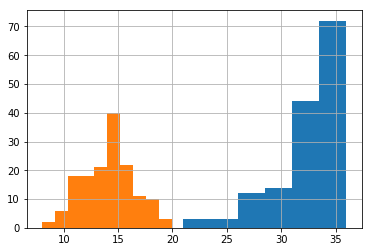

In [15]:
df.rpm.hist(), df.shv.hist()

Uvidom u rezultate testova ovog učenika vidimo da su njegovi rezultati očekivani, to jest ima rezultate slične ostalim učenicima. Ipak, na testovima nisu merene telesno-kinetičke osobine pa o tome ne možemo više zaključiti. Ostavljamo prostora da detaljnije protumačimo ovog učenika u slučaju da se on pojavi kao izuzetak i pri drugim pristupima. 

In [16]:
outliers_rb = [item for sublist in list(outliers.values()) for item in sublist]
outliers_rb = list(set(outliers_rb))

U našem datasetu većina kolona odnosi se na ocene različitih osobina od različitih ocenjivača, s toga biti izuzetak po jednoj koloni nije previše značajno. Zbog toga je odlučeno da i pri univarijantnim metodama obratimo pažnju na one obzervacije koje se javljaju kao izuzeci po više kolona.

In [17]:
idnetified_outliers = {rb: [] for rb in outliers_rb}
for outlier in outliers_rb:
    for key in outliers.keys():
        if outlier in outliers[key]:
                idnetified_outliers[outlier] = idnetified_outliers[outlier] + [key]
idnetified_outliers

{97: ['nasss'],
 2: ['nasintra', 'rodvp', 'ucevp', 'uceintra'],
 70: ['rpm'],
 10: ['nasss'],
 11: ['nasss', 'rodlm', 'rodtk', 'ucetk'],
 91: ['rpm'],
 77: ['rpm'],
 82: ['nasss'],
 83: ['nasss'],
 146: ['nastk'],
 147: ['nasmr'],
 54: ['rodtk', 'ucevp', 'ucetk'],
 149: ['rodintr', 'rodintra'],
 116: ['vrsintr'],
 89: ['nasvp', 'nasintr', 'nasfil'],
 90: ['nasintr'],
 21: ['ucenraz'],
 92: ['nasvl', 'nasvp'],
 30: ['vrsintra'],
 31: ['vrsintr']}

In [18]:
multi_outliers = [key for key in idnetified_outliers.keys() if len(idnetified_outliers[key]) > 2]

In [19]:
multi_outliers = {k: idnetified_outliers[k] for k in multi_outliers}
multi_outliers

{2: ['nasintra', 'rodvp', 'ucevp', 'uceintra'],
 11: ['nasss', 'rodlm', 'rodtk', 'ucetk'],
 54: ['rodtk', 'ucevp', 'ucetk'],
 89: ['nasvp', 'nasintr', 'nasfil']}

In [20]:
outliers_df = df.loc[list(multi_outliers.keys()), :]
outliers_df

,naspol,nasss,nastrs,nasvl,naslm,nasvp,nastk,nasmr,nasintr,nasintra,nasprir,nasfil,rodss,rodpol,rodvl,rodlm,rodvp,rodtk,rodmr,rodintr,rodintra,rodprir,rodfil,vrspol,vrsray,vrsvl,vrslm,vrsvp,vrstk,vrsmr,vrsintr,vrsintra,vrsprir,vrsfil,ucepol,ucenraz,ucevl,ucelm,ucevp,ucetk,ucemr,uceintr,uceintra,uceprir,ucefil,rpm,vs,shv,Rnasvl
RB,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,3,2,50,40,44,42,38,60,59,38,37,1,2,46,57,50,44,28,67,65,40,33,1,2,46,49,52,43,42,68,65,47,37,1,2,45,42,45,37,36,65,63,44,33,36,12,16,30.0
11,1,1,3,65,61,57,52,52,50,53,48,49,3,1,50,59,52,51,41,57,60,43,46,2,1,64,69,62,69,51,67,71,61,56,2,1,53,51,50,54,31,59,62,49,47,26,7,11,131.0
54,1,3,1,54,59,68,52,61,66,72,53,60,1,1,49,59,70,51,55,61,70,54,61,1,1,50,51,55,49,47,53,63,49,57,1,1,48,43,54,44,42,48,52,46,30,35,13,13,48.0
89,2,3,1,61,42,45,52,66,61,64,27,39,1,1,54,47,54,59,61,69,65,47,44,1,1,65,61,57,63,61,63,62,65,65,1,1,60,54,54,61,62,59,56,46,41,30,6,11,98.0


In [21]:
def add_summary_columns(df, COLS_TEST = ['vl', 'lm', 'vp', 'tk', 'mr', 'intr', 'intra', 'prir', 'fil']):
    df['nas_sum'] = df[["nas"+col for col in COLS_TEST]].apply(np.sum, axis=1)
    df['rod_sum'] = df[["rod"+col for col in COLS_TEST]].apply(np.sum, axis=1)
    df['vr_sum'] = df[["vrs"+col for col in COLS_TEST]].apply(np.sum, axis=1)
    df['uce_sum'] = df[["uce"+col for col in COLS_TEST]].apply(np.sum, axis=1)
    return df

In [22]:
outliers_df = add_summary_columns(outliers_df)
outliers_df.to_csv('data/outliers_z_score.csv')
outliers_df

,naspol,nasss,nastrs,nasvl,naslm,nasvp,nastk,nasmr,nasintr,nasintra,nasprir,nasfil,rodss,rodpol,rodvl,rodlm,rodvp,rodtk,rodmr,rodintr,rodintra,rodprir,rodfil,vrspol,vrsray,vrsvl,vrslm,vrsvp,vrstk,vrsmr,vrsintr,vrsintra,vrsprir,vrsfil,ucepol,ucenraz,ucevl,ucelm,ucevp,ucetk,ucemr,uceintr,uceintra,uceprir,ucefil,rpm,vs,shv,Rnasvl,nas_sum,rod_sum,vr_sum,uce_sum
RB,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,3,2,50,40,44,42,38,60,59,38,37,1,2,46,57,50,44,28,67,65,40,33,1,2,46,49,52,43,42,68,65,47,37,1,2,45,42,45,37,36,65,63,44,33,36,12,16,30.0,408,430,449,410
11,1,1,3,65,61,57,52,52,50,53,48,49,3,1,50,59,52,51,41,57,60,43,46,2,1,64,69,62,69,51,67,71,61,56,2,1,53,51,50,54,31,59,62,49,47,26,7,11,131.0,487,459,570,456
54,1,3,1,54,59,68,52,61,66,72,53,60,1,1,49,59,70,51,55,61,70,54,61,1,1,50,51,55,49,47,53,63,49,57,1,1,48,43,54,44,42,48,52,46,30,35,13,13,48.0,545,530,474,407
89,2,3,1,61,42,45,52,66,61,64,27,39,1,1,54,47,54,59,61,69,65,47,44,1,1,65,61,57,63,61,63,62,65,65,1,1,60,54,54,61,62,59,56,46,41,30,6,11,98.0,457,500,562,493


Može se reći da su prethodna 4 reda validni izuzeci identifikovani ovom metodom. Posebno interesantan izuzetak jeste `opservacija 54`, koja na krajnjim testovima ima najbolje rezultate od svih uočenih. 
- Zanimljivo je da su među izuzecima telesno-kinetičke ocene koje se na krajnjim testovima nisu merile. 
- Najveće ocene učenik je dobio od nastavnika i roditelja, dok je sebe samog ocenio znatno niže nego što su to drugi učenici. 

Učenik sa rednim brojem `11` je takođe zanimljiv izuzetak, s obzirom da je postigao dobre rezultate na krajnjim testovima. Podsetnika radi, ovaj izuzetak je prvi uočen zbog manje kvalifikacije profesora. Iako su ga sve grupe ocenjivača slabije ocenile, sličnost sa prvim opisanim učenikom jeste ta što je i on takođe sebe ocenio znatno niže nego što su to radili drugi učenici sa gorim rezultatima.

Opservacije `2` i `89` može se reći da imaju slično ponašanje - ocenjivači ih ocenjuju visoko u osobinama koje su merene testovima (dakle ne telesno-kinetičke) i oni imaju samopouzdanja pri ocenjivanju sebe. Na kraju na testovima imaju znatno niže rezultate. Zanimljivo je da najgore rezultate na testovima pokazuje učenik `89` koji je najbolje ocenio sebe.

Kao jedan od zaključaka iz ovog tumačenja izvlači se da su na krajnjim testovima najbolje prolazili skromniji studenti dok su rezultate ispod proseka imali studenti koji su visoko ocenjivali sami sebe, ali i dobijali visoke ocene od drugih grupa ocenjivača. 

#### 1.2. Identifikacija anomalija na osnovu interkvantilnog ranga (IQR based anomaly detection)
Drugi pristup posmatra interkvantilni opseg (iqr = razlika između prvog i trećeg kvantila). Sve tačke koje su ispod `quantile_1 - 1.5*iqr` ili iznad `quantile_3 + 1.5*iqr`, posmatraju se kao anomalije.

Više o ovim pristupima može se pročitati u [ovom blogu](http://colingorrie.github.io/outlier-detection.html). S obzirom da se radi o jednostavnoj statističkoj metodi, kao i kod prethodne, odlučeno je da se ne koristi gotova implementacija već da se otkuca *ručno* algoritam.

In [23]:
def iqr_outliers(ys):
    quant1 = ys.quantile(.25)
    quant3 = ys.quantile(.75)
    iqr = quant3 - quant1
    min_out = list(np.where(ys < (quant1-1.5*iqr))[0]) 
    max_out = list(np.where(ys > (quant3+1.5*iqr))[0]) 
    return min_out + max_out

In [24]:
outliers = {}
for col in df.columns:
    outliers[col] = iqr_outliers(df[col])

In [25]:
outliers_rb = [item for sublist in list(outliers.values()) for item in sublist]
outliers_rb = list(set(outliers_rb))
outliers_rb

[0,
 2,
 3,
 5,
 10,
 11,
 15,
 16,
 17,
 18,
 147,
 146,
 143,
 149,
 150,
 21,
 25,
 30,
 31,
 33,
 34,
 35,
 39,
 40,
 41,
 42,
 43,
 48,
 49,
 50,
 51,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 62,
 63,
 64,
 69,
 70,
 77,
 82,
 83,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 97,
 105,
 107,
 108,
 109,
 115,
 116,
 117,
 119,
 121,
 124]

S obzirom da ova metoda ima relaksiranije granice za izuzetke, upravljaćemo *strogosti* procene preko praga (threshold) broja kolona u kojima se određena opservacija pojavljuje kao izuzetak. Kod ovog pristupa, prag ćemo postaviti na 3. Ostavlja se prostor za diskusiju u vezi praga.

In [26]:
nasss_outliers = {rb: [] for rb in outliers_rb}
for outlier in outliers_rb:
    for key in outliers.keys():
        if outlier in outliers[key]:
                nasss_outliers[outlier] = nasss_outliers[outlier] + [key]

In [27]:
multi_outliers = [key for key in nasss_outliers.keys() if len(nasss_outliers[key]) > 3]
multi_outliers = {k: nasss_outliers[k] for k in multi_outliers}
multi_outliers

{2: ['nasvp', 'nasintra', 'rodvp', 'ucevl', 'ucevp', 'uceintra'],
 11: ['nasss', 'rodlm', 'rodvp', 'rodtk', 'ucetk'],
 147: ['nasvl', 'nasvp', 'nasmr', 'uceprir'],
 89: ['naspol', 'nasvp', 'nasintr', 'nasfil'],
 92: ['naspol', 'nasvl', 'nasvp', 'nasfil']}

S obzirom da su ova dva pristupa jako slična, dobili smo neke iste izuzetke kao korišenjem z-skora, sa dodatkom dva nova. Zanimljivo je primetiti da se za tri ista izuzetka (2, 11, 89) u sada proširenim listama ekstremnih kolona jasnije vidi fenomen opisan dodavanjem zbirnim kolona prilikom prošlog tumačenja.

In [28]:
outliers_df = df.loc[list(multi_outliers.keys()), :]
outliers_df = add_summary_columns(outliers_df)
outliers_df.to_csv('data/outliers_iqr_score.csv')
outliers_df

,naspol,nasss,nastrs,nasvl,naslm,nasvp,nastk,nasmr,nasintr,nasintra,nasprir,nasfil,rodss,rodpol,rodvl,rodlm,rodvp,rodtk,rodmr,rodintr,rodintra,rodprir,rodfil,vrspol,vrsray,vrsvl,vrslm,vrsvp,vrstk,vrsmr,vrsintr,vrsintra,vrsprir,vrsfil,ucepol,ucenraz,ucevl,ucelm,ucevp,ucetk,ucemr,uceintr,uceintra,uceprir,ucefil,rpm,vs,shv,Rnasvl,nas_sum,rod_sum,vr_sum,uce_sum
RB,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1,3,2,50,40,44,42,38,60,59,38,37,1,2,46,57,50,44,28,67,65,40,33,1,2,46,49,52,43,42,68,65,47,37,1,2,45,42,45,37,36,65,63,44,33,36,12,16,30.0,408,430,449,410
11,1,1,3,65,61,57,52,52,50,53,48,49,3,1,50,59,52,51,41,57,60,43,46,2,1,64,69,62,69,51,67,71,61,56,2,1,53,51,50,54,31,59,62,49,47,26,7,11,131.0,487,459,570,456
147,1,3,3,63,72,69,5,69,71,67,64,67,1,1,51,57,59,57,53,62,55,51,47,2,2,58,46,48,59,49,60,59,43,47,2,2,59,68,65,65,63,61,59,64,65,35,13,12,113.0,547,492,469,569
89,2,3,1,61,42,45,52,66,61,64,27,39,1,1,54,47,54,59,61,69,65,47,44,1,1,65,61,57,63,61,63,62,65,65,1,1,60,54,54,61,62,59,56,46,41,30,6,11,98.0,457,500,562,493
92,1,2,3,50,35,50,58,50,63,59,53,38,3,2,53,44,53,68,54,65,66,58,43,1,1,65,65,54,53,54,61,62,71,65,1,1,72,72,73,71,64,72,70,71,74,12,2,11,30.0,456,504,550,639


Dva nova izuzetka koja su se pojavila su potpuno novog tipa od prethodno tumačenih. 

`Učenik 147` jeste učenik sa ekstremno dobrim ocenama od strane nastavnika. Te ocene praćene su visokim ocenama od strane samog sebe sumarno. Na kraju u rezultatima testova možemo primetiti da je taj učenik veoma dobro uradio. Odavde možemo izvući tvrdnju da učenik dobro radi testove u slučajevima kada se *poklope* mišljenja samog učenika i nastavnika pri ocenjivanju. 

`Učenik 92` ima veoma visoke ocene od strane nastavnika u verbalno-lingvističkim, vizuelno-prostornim i filozofsko-duhovnim osobinama, ali jako niske u ostalim osobinama. Sebe procenjuje sumarno izuzetno visoko u svim disciplinama. Takođe, vršnjaci i roditelji ga takođe procenjuju visoko. Na testovima je pokazao veoma loše rezultate, što dovodi do zaključka da je u ovom slučaju nastavnikova procena bila bolja. Može se postaviti tvrdnja da učenici koji su po nastavnikovom mišljenju dobri u društvenim disciplinama lakše dobijaju veoma visoke ocene od svih ocenjivača koje nisu opravdane. 


### 2. Multivarijantne strategije

Grubo, ove algoritme možemo podeliti na 4 osnovne grupe:
1. Algoritmi zasnovani na najbližim susedima
2. Algoritmi zasnovani na klasterovanju
3. Algoritmi zasnovani na ansamblima
4. Algoritmi zasnovani na neuronskim mrežama

#### 2.1. Identifikacija anomalija na osnovu metoda K-najbližih suseda (KNN-based anomaly detector)

Proračunava udaljenost tačke od svojih k-najbližih suseda. Za svaku tačku se kao njen anomaly_score koristi udaljenost od k suseda. Može se koristiti: 
- Udaljenost od najdaljeg od k suseda
- Srednja udaljenost
- Medijana udaljenosti

Više o algoritmu i Python implementaciji može se pročitati u citiranim radovima i [dokumentaciji PyOD paketa](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.knn).

#### Korak nazad: Skaliranje podataka

Naši podaci su uglavnom na sličnim skalama, ali ne i na potpuno istim. S obzirom na prirodu algoritama koji rade sa udaljenostima, oni će biti znatno tačniji ako su podaci na istoj skali. S obzirom da su u pitanju ocene, bilo bi dobro da skaliranjem sredimo problem **pristrasnosti ocenjivača**. Elem, ocenjivači su često pristrasni pri svojim ocenama pa neki svim studentima daju niske ocene dok neki svima daju jako visoke ocene. 

Pored toga, bilo bi dobro i posle skaliranja **zadržati interpretabilnost** kako bismo mogli da tumačimo dobijene anomalije bez vraćanja u prvobitan prostor podataka (na prvobitne skale, originalne podatke). 

Imajući u vidu dva navedena kriterijuma, odlučeno je da podatke skaliramo `MAXMIN` normom kao jednom od najkorišćenijih. Maxmin norma će normalizovati podatke između 0 i 1, dok konkretne vrednosti možemo posmatrati kao udaljenost od maksimalne/minimalne vrednosti za tu kolonu. 

Ostavlja se prostor za diskusije i predloge drugih normi. 

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()
scaler.fit(df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [31]:
scaled_df = pd.DataFrame(scaler.transform(df), columns=df.columns)
scaled_df.head()

,naspol,nasss,nastrs,nasvl,naslm,nasvp,nastk,nasmr,nasintr,nasintra,nasprir,nasfil,rodss,rodpol,rodvl,rodlm,rodvp,rodtk,rodmr,rodintr,rodintra,rodprir,rodfil,vrspol,vrsray,vrsvl,vrslm,vrsvp,vrstk,vrsmr,vrsintr,vrsintra,vrsprir,vrsfil,ucepol,ucenraz,ucevl,ucelm,ucevp,ucetk,ucemr,uceintr,uceintra,uceprir,ucefil,rpm,vs,shv,Rnasvl
0,0.0,1.0,0.5,0.333333,0.000,0.645833,0.632353,0.666667,0.555556,0.365854,0.183673,0.333333,0.0,0.0,0.361111,0.425532,0.717391,0.52,0.680851,0.705882,0.558140,0.288462,0.489796,0.0,1.0,0.432432,0.347826,0.500000,0.425532,0.595745,0.642857,0.754717,0.472727,0.620690,0.0,0.333333,0.205128,0.186047,0.60,0.396226,0.555556,0.212121,0.447368,0.351852,0.307692,0.76,0.722222,0.750000,0.060403
1,0.0,1.0,0.5,0.487179,0.175,0.416667,0.544118,0.314815,0.666667,0.609756,0.306122,0.313725,0.0,1.0,0.277778,0.702128,0.500000,0.40,0.063830,0.843137,0.767442,0.442308,0.224490,0.0,1.0,0.216216,0.434783,0.477273,0.319149,0.297872,0.833333,0.811321,0.490909,0.344828,0.0,0.333333,0.230769,0.255814,0.42,0.301887,0.133333,0.696970,0.684211,0.425926,0.192308,1.00,0.666667,0.666667,0.194631
2,0.0,1.0,0.5,0.282051,0.225,0.250000,0.558824,0.351852,0.577778,0.000000,0.204082,0.156863,0.0,0.0,0.138889,0.212766,0.000000,0.40,0.276596,0.509804,0.418605,0.269231,0.346939,0.0,1.0,0.162162,0.326087,0.204545,0.425532,0.361702,0.642857,0.849057,0.272727,0.327586,1.0,0.333333,0.000000,0.000000,0.00,0.283019,0.088889,0.090909,0.000000,0.148148,0.038462,1.00,0.722222,0.666667,0.033557
3,0.0,1.0,0.0,0.487179,0.675,0.166667,0.338235,0.240741,0.355556,0.439024,0.489796,0.529412,0.0,0.0,0.444444,0.531915,0.500000,0.48,0.425532,0.490196,0.441860,0.673077,0.142857,1.0,0.0,0.459459,0.652174,0.522727,0.297872,0.574468,0.738095,0.867925,0.509091,0.637931,1.0,0.000000,0.410256,0.302326,0.46,0.641509,0.666667,0.090909,0.210526,0.555556,0.269231,0.80,0.666667,0.166667,0.194631
4,0.0,1.0,0.0,0.384615,0.300,0.395833,0.823529,0.592593,0.466667,0.536585,0.326531,0.607843,0.0,1.0,0.111111,0.297872,0.369565,0.68,0.404255,0.666667,0.674419,0.365385,0.306122,0.0,0.0,0.351351,0.326087,0.272727,0.638298,0.489362,0.714286,0.679245,0.636364,0.413793,1.0,0.000000,0.461538,0.232558,0.26,0.622642,0.244444,0.303030,0.526316,0.555556,0.442308,0.88,0.277778,0.416667,0.093960


Obratimo pažnju da nismo izdvojili opisne osobine (pol, stručna sprema...) pre skaliranja. Razlog tome je što brojevi kojima su one predstavljene jesu interpretabilni čak i nakon skaliranja, jer su u pitanju binarne varijable i ordinalne skale. Primera radi, stručna sprema sada ima vrednosti 0, 0.5, 1 koje redom predstavljaju 1, 2 i 3. stepen stručne spreme.

In [32]:
scaled_df['nasss'].unique()

array([1. , 0. , 0.5])

Obratiti pažnju da ćemo u daljoj analizi koristiti skalirani dataset i za primenu algoritma i za tumačenje s obzirom da pomoću njega dobijamo lakšu interpretabilnost u kontekstu da ne moramo paziti na početne skale. 

In [33]:
!pip install pyod

Pre nego da primenimo algoritam, postavićemo inicijalne metaparametre. Oni su zadati varijablama, pa se ostavlja prostor čitaocu da proba promene, izvrši algoritam i vidi kako je to uticalo. Inicijalne vrednosti su dobijene probanjem različitih vrednosti i popularnim heuristikama. Metod koji se koristi je medijana, jer bi korišćenjem `largest` metoda dobili metod koji liči na prethodne univarjantne, z-score i iqr.

In [34]:
OUTLIERS_FRACTION = 0.1
KNN_METHOD = 'median'
K = 7

In [35]:
from pyod.models.knn import KNN
clf = KNN(contamination=OUTLIERS_FRACTION, method=KNN_METHOD, n_neighbors=K)
clf.fit(scaled_df)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='median',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=7, p=2,
  radius=1.0)

In [36]:
clf.decision_scores_

array([1.70283307, 1.88429609, 2.18478878, 1.83930464, 1.78084035,
       1.8067299 , 1.65516531, 1.39254125, 1.93138584, 1.73654854,
       2.0505284 , 2.34280261, 1.69175053, 1.69536031, 1.53071506,
       1.93512438, 1.72508173, 1.84212397, 1.96300894, 1.91079223,
       1.74665999, 1.9528193 , 1.68587839, 1.28585736, 1.70001813,
       1.61019957, 1.57208395, 1.73514442, 1.73514442, 1.8048875 ,
       1.82522846, 2.03424018, 1.84495233, 2.04061422, 1.66844658,
       1.82660486, 1.44385592, 1.83094033, 1.36616411, 2.06253451,
       1.98529542, 1.94849091, 1.72508173, 1.72639054, 1.48597433,
       1.46644756, 1.45764319, 1.60045467, 1.85579294, 1.76216357,
       1.72027094, 1.79527171, 1.70734956, 1.67330731, 2.10555574,
       2.03155204, 1.78228961, 2.14662901, 1.904296  , 1.69907356,
       1.85005202, 1.63883566, 1.88709004, 1.88516606, 1.66688334,
       1.44385592, 1.50588237, 1.65155228, 1.49296338, 1.92633179,
       1.94072173, 1.75469391, 1.89330327, 1.59010012, 1.74422

Svaki od algoritama koji koristimo kao izlaz daje skor odluke da li je neka obzervacija izuzetak, konkretnu odluku i verovatnoću da je određena obzervacija izuzetak. Radi lakšeg poređenja više metoda, odlučeno je da ova tri rezultata za svaki metod budu dodata kao nove kolone dataseta. 

In [37]:
result_df = scaled_df.copy()
result_df['knn_score'] = clf.decision_scores_
result_df['knn_proba'] = clf.predict_proba(scaled_df)[:,1]
result_df['knn_outlier'] = clf.predict(scaled_df)

In [38]:
result_df.query('knn_outlier == 1')

,naspol,nasss,nastrs,nasvl,naslm,nasvp,nastk,nasmr,nasintr,nasintra,nasprir,nasfil,rodss,rodpol,rodvl,rodlm,rodvp,rodtk,rodmr,rodintr,rodintra,rodprir,rodfil,vrspol,vrsray,vrsvl,vrslm,vrsvp,vrstk,vrsmr,vrsintr,vrsintra,vrsprir,vrsfil,ucepol,ucenraz,ucevl,ucelm,ucevp,ucetk,ucemr,uceintr,uceintra,uceprir,ucefil,rpm,vs,shv,Rnasvl,knn_score,knn_proba,knn_outlier
2,0.0,1.0,0.5,0.282051,0.225,0.250000,0.558824,0.351852,0.577778,0.000000,0.204082,0.156863,0.0,0.0,0.138889,0.212766,0.000000,0.40,0.276596,0.509804,0.418605,0.269231,0.346939,0.0,1.0,0.162162,0.326087,0.204545,0.425532,0.361702,0.642857,0.849057,0.272727,0.327586,1.0,0.333333,0.000000,0.000000,0.00,0.283019,0.088889,0.090909,0.000000,0.148148,0.038462,1.00,0.722222,0.666667,0.033557,2.184789,0.797904,1
11,0.0,0.0,1.0,0.564103,0.375,0.541667,0.647059,0.500000,0.422222,0.365854,0.489796,0.509804,0.0,0.0,0.083333,0.000000,0.065217,0.08,0.255319,0.450980,0.302326,0.096154,0.020408,0.0,0.0,0.675676,0.391304,0.772727,0.446809,0.340426,0.571429,0.773585,0.654545,0.689655,0.0,0.000000,0.435897,0.302326,0.28,0.132075,0.222222,0.121212,0.394737,0.185185,0.211538,1.00,0.166667,0.250000,0.278523,2.342803,0.944502,1
54,0.0,1.0,1.0,0.461538,0.050,0.687500,0.558824,0.592593,0.711111,0.707317,0.489796,0.313725,0.0,1.0,0.722222,0.702128,0.391304,0.00,0.468085,0.901961,0.953488,0.846154,0.591837,0.0,0.0,0.594595,0.304348,0.454545,0.212766,0.425532,0.690476,0.754717,0.272727,0.431034,1.0,0.000000,0.564103,0.302326,0.08,0.000000,0.333333,0.484848,0.605263,0.537037,0.134615,0.96,0.500000,0.166667,0.171141,2.105556,0.771637,1
57,1.0,1.0,0.0,0.410256,0.675,0.875000,0.661765,0.351852,0.600000,0.756098,0.530612,0.333333,0.0,1.0,0.416667,0.510638,0.369565,0.70,0.468085,0.647059,0.558140,0.615385,0.591837,1.0,1.0,0.054054,0.043478,0.136364,0.148936,0.000000,0.214286,0.396226,0.000000,0.413793,1.0,0.333333,0.538462,0.581395,0.50,0.679245,0.311111,0.030303,0.473684,0.444444,0.557692,0.76,0.277778,0.250000,0.120805,2.146629,0.779031,1
85,0.0,1.0,0.0,0.589744,0.700,0.791667,0.617647,0.314815,0.377778,0.439024,0.346939,0.529412,1.0,1.0,0.500000,0.787234,0.760870,0.38,0.404255,0.411765,0.348837,0.730769,0.428571,1.0,0.0,0.297297,0.021739,0.340909,0.000000,0.063830,0.357143,0.566038,0.200000,0.224138,1.0,0.000000,0.179487,0.348837,0.50,0.320755,0.311111,0.181818,0.578947,0.481481,0.442308,0.88,0.000000,0.333333,0.315436,2.043640,0.716612,1
89,1.0,1.0,0.0,0.282051,0.550,0.000000,0.514706,0.574074,0.000000,0.268293,0.081633,0.000000,0.0,1.0,0.138889,0.489362,0.391304,0.64,0.659574,0.568627,0.511628,0.500000,0.448980,1.0,0.0,0.675676,0.565217,0.477273,0.574468,0.595745,0.476190,0.471698,0.200000,0.603448,1.0,0.000000,1.000000,0.883721,0.72,0.943396,0.688889,1.000000,1.000000,0.796296,1.000000,0.68,0.111111,0.250000,0.033557,2.163897,0.813002,1
91,0.0,0.5,1.0,0.487179,0.050,0.541667,0.779412,0.537037,0.733333,0.609756,0.612245,0.333333,1.0,1.0,0.472222,0.425532,0.565217,0.88,0.617021,0.803922,0.790698,0.788462,0.428571,0.0,0.0,0.729730,0.782609,0.522727,0.531915,0.553191,0.666667,0.754717,0.927273,0.827586,0.0,0.000000,0.923077,0.953488,0.98,0.943396,0.755556,0.909091,0.868421,0.925926,0.980769,0.04,0.111111,0.250000,0.194631,2.192756,0.751898,1
92,1.0,1.0,0.0,0.000000,0.625,0.083333,0.397059,0.481481,0.333333,0.365854,0.000000,0.039216,1.0,0.0,0.305556,0.659574,0.391304,0.62,0.468085,0.882353,0.720930,0.596154,0.571429,1.0,0.0,0.135135,0.260870,0.090909,0.404255,0.340426,0.642857,0.566038,0.272727,0.517241,1.0,0.000000,0.666667,0.697674,0.52,0.811321,0.511111,0.575758,0.631579,0.611111,0.384615,0.72,0.333333,0.250000,0.000000,2.063269,0.725246,1


Primetimo da su identifikovana ista 5 izuzetka kao i kod prethodnih metoda, ali i neki novi.

Obratiti pažnju da dodajemo nove kolone koje opisuju odluku metoda da li je neka opservacija izuzetak. Na taj način metode posmatramo kao `glasače` ili sudije koje procenjuju da li je neka opservacija izuzetak. Na kraju uprosečavanjem tih ocena to jest algoritama, pravimo svoj ansambal od izabranih metoda i komentarišemo tako dobijene izuzetke.

#### 2.2. Identifikacija anomalija na osnovu ugla (Angle-Based Outlier Detection (ABOD))

[Više o algoritmu](https://imada.sdu.dk/~zimek/publications/KDD2008/KDD08-ABOD.pdf) Može se reći da pripada grupi algoritama zasnovanim na susedima

Intuicija: Posmatramo veze svake observacije sa ostalima tako što, umesto da računamo samo udaljenost, projektujemo vektore. Ako je spektar vektora veliki obzervacija nije outlier (u svim pravcima u odnosu na njega ima drugih zapisa). Ako su svi vektori ka jednoj strani onda je outlier.

Postoji implementacija u Pythonu. Više u [dokumentaciji.](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.abod)

In [39]:
from pyod.models.abod import ABOD

In [40]:
abod_model = ABOD(contamination=OUTLIERS_FRACTION)

In [41]:
abod_model.fit(scaled_df)

ABOD(contamination=0.1, method='fast', n_neighbors=5)

In [42]:
result_df['abod_score'] = abod_model.decision_scores_
result_df['abod_proba'] = abod_model.predict_proba(scaled_df)[:,1]
result_df['abod_outlier'] = abod_model.predict(scaled_df)

In [43]:
result_df.query('abod_outlier == 1')

,naspol,nasss,nastrs,nasvl,naslm,nasvp,nastk,nasmr,nasintr,nasintra,nasprir,nasfil,rodss,rodpol,rodvl,rodlm,rodvp,rodtk,rodmr,rodintr,rodintra,rodprir,rodfil,vrspol,vrsray,vrsvl,vrslm,vrsvp,vrstk,vrsmr,vrsintr,vrsintra,vrsprir,vrsfil,ucepol,ucenraz,ucevl,ucelm,ucevp,ucetk,ucemr,uceintr,uceintra,uceprir,ucefil,rpm,vs,shv,Rnasvl,knn_score,knn_proba,knn_outlier,abod_score,abod_proba,abod_outlier
2,0.0,1.0,0.5,0.282051,0.225,0.250000,0.558824,0.351852,0.577778,0.000000,0.204082,0.156863,0.0,0.0,0.138889,0.212766,0.000000,0.40,0.276596,0.509804,0.418605,0.269231,0.346939,0.0,1.0,0.162162,0.326087,0.204545,0.425532,0.361702,0.642857,0.849057,0.272727,0.327586,1.0,0.333333,0.000000,0.000000,0.00,0.283019,0.088889,0.090909,0.000000,0.148148,0.038462,1.00,0.722222,0.666667,0.033557,2.184789,0.797904,1,-0.001202,0.966105,1
7,0.0,1.0,0.0,0.794872,0.625,0.583333,0.911765,0.870370,0.777778,0.682927,0.591837,0.745098,0.5,1.0,0.694444,0.574468,0.782609,0.44,0.702128,0.843137,0.581395,0.403846,0.408163,0.0,1.0,0.621622,0.456522,0.500000,0.553191,0.553191,0.738095,0.716981,0.454545,0.741379,0.0,0.333333,0.564103,0.395349,0.62,0.566038,0.533333,0.787879,0.710526,0.351852,0.423077,0.84,0.388889,0.416667,0.697987,1.392541,0.000000,0,-0.002801,0.973771,1
8,0.0,1.0,0.5,0.435897,0.125,0.562500,0.470588,0.462963,0.666667,0.414634,0.285714,0.274510,0.0,0.0,0.277778,0.297872,0.391304,0.26,0.361702,0.607843,0.465116,0.365385,0.204082,0.0,0.0,0.675676,0.608696,0.727273,0.574468,0.829787,1.000000,0.924528,0.800000,0.793103,0.0,0.000000,0.564103,0.860465,0.88,0.584906,0.800000,0.969697,1.000000,0.851852,0.903846,0.88,0.277778,0.250000,0.147651,1.931386,0.607013,0,-0.002013,0.997912,1
11,0.0,0.0,1.0,0.564103,0.375,0.541667,0.647059,0.500000,0.422222,0.365854,0.489796,0.509804,0.0,0.0,0.083333,0.000000,0.065217,0.08,0.255319,0.450980,0.302326,0.096154,0.020408,0.0,0.0,0.675676,0.391304,0.772727,0.446809,0.340426,0.571429,0.773585,0.654545,0.689655,0.0,0.000000,0.435897,0.302326,0.28,0.132075,0.222222,0.121212,0.394737,0.185185,0.211538,1.00,0.166667,0.250000,0.278523,2.342803,0.944502,1,-0.000203,0.997918,1
18,1.0,1.0,0.5,0.743590,0.675,0.833333,0.882353,0.611111,0.733333,0.609756,0.387755,0.490196,1.0,0.0,0.444444,0.382979,0.630435,0.52,0.531915,0.509804,0.674419,0.846154,0.224490,1.0,1.0,0.486486,0.847826,0.613636,0.744681,0.617021,0.785714,0.830189,0.563636,0.465517,1.0,0.333333,0.358974,0.069767,0.38,0.509434,0.177778,0.242424,0.315789,0.277778,0.173077,0.96,0.444444,0.583333,0.593960,1.963009,0.632059,0,-0.000359,1.000000,1
19,0.0,1.0,0.0,1.000000,0.825,0.875000,0.558824,0.333333,0.444444,0.560976,0.653061,0.686275,1.0,1.0,1.000000,0.829787,0.804348,0.70,0.680851,0.803922,0.627907,0.750000,0.897959,0.0,1.0,0.891892,0.826087,0.840909,0.893617,0.723404,0.928571,0.943396,0.745455,0.724138,0.0,0.333333,0.897436,0.744186,0.96,0.943396,0.711111,0.969697,0.973684,1.000000,1.000000,1.00,0.833333,0.500000,1.000000,1.910792,0.579275,0,-0.000701,0.985207,1
20,0.0,1.0,0.0,0.615385,0.825,0.645833,0.632353,0.500000,0.866667,0.536585,0.632653,0.568627,0.0,0.0,0.277778,0.659574,0.456522,0.68,0.680851,0.764706,0.651163,0.480769,0.551020,0.0,1.0,0.864865,0.913043,1.000000,0.914894,0.914894,0.976190,1.000000,1.000000,0.982759,0.0,0.333333,0.589744,0.651163,0.70,0.962264,0.911111,0.939394,0.921053,0.907407,0.942308,1.00,0.944444,0.583333,0.352349,1.746660,0.312440,0,-0.003216,0.978154,1
32,0.0,1.0,0.5,0.846154,0.900,0.958333,1.000000,0.851852,1.000000,0.853659,0.877551,0.921569,0.0,0.0,0.500000,0.872340,0.565217,0.80,0.617021,0.862745,0.813953,0.730769,0.795918,1.0,0.0,0.108108,0.304348,0.000000,0.553191,0.042553,0.380952,0.433962,0.436364,0.155172,1.0,0.000000,0.282051,0.837209,0.56,0.830189,0.577778,0.484848,0.710526,0.592593,0.769231,0.96,0.666667,0.583333,0.812081,1.844952,0.525805,0,-0.002555,0.980922,1
46,0.0,1.0,0.5,0.666667,0.600,0.541667,0.588235,0.537037,0.666667,0.463415,0.632653,0.450980,0.0,1.0,0.527778,0.680851,0.478261,0.46,0.382979,0.725490,0.604651,0.82692

Ovaj metod našao je čak 28 izuzetka, pa odmah možemo zaključiti da ovo nisu svi izuzeci, iako su među njima skoro svi ranije uočeni. Ovaj algoritam značiće kao veoma dobar član ansambla koji će povećati značajnost odluke u vezi nekih opservacija.

#### 2.3. Identifikacija anomalija na osnovu klasterovanja (Clustering-based anomaly detector)

Osnovna ideja: Podeliti podatke u klastere i kao anomaly_score koristiti udaljenost od centroida. 

Postoji Python implementacija i o njoj se više može pročitati [ovde](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof). 

Međutim poznato je da je k-means veoma pristrasan kada radi sa korelisanim podacima. Iz tog razloga odlučeno je da probamo sledeći prilagođeni algoritam:
1. Uraditi PCA
2. Probati više clustering modela za različiti broj klastera nad glavnim komponentama
3. Izabrati broj klastera
4. Pustiti konačan klastering model i kao anomaly_score koristiti udaljenost od centroida
5. Nakon uočenih anomalija, vratiti se u početni prostor

U nastavku će ovaj pristup biti implementiran. O kombinaciji PCA i klasterovanja može se pročitati u [ovom radu](https://ieeexplore.ieee.org/document/7012911).

In [44]:
from sklearn.decomposition import PCA

pca = PCA(.90)
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [45]:
df_components = pca.transform(scaled_df)
df_components.shape

(151, 19)

Primenom PCA uočavamo da 90% varijabiliteta dataseta može biti opisano pomoću 19 glavnih komponenti:

In [46]:
pca.components_

array([[ 4.53072635e-02,  1.11264551e-02, -2.92289699e-02,
        -1.41553018e-01, -1.10063015e-01, -1.43053109e-01,
        -4.32258894e-02, -1.23749591e-01, -1.52795478e-01,
        -1.38374312e-01, -1.29807994e-01, -1.50050731e-01,
        -1.22838149e-01, -6.14561102e-02, -1.71455531e-01,
        -1.02253715e-01, -1.38857920e-01, -5.73809573e-02,
        -1.49384936e-01, -1.15180873e-01, -1.34107009e-01,
        -1.05363282e-01, -1.65963888e-01,  2.26252437e-01,
        -2.58004403e-01, -1.44421575e-01, -1.30524272e-01,
        -1.65762609e-01, -7.01263005e-02, -1.37719465e-01,
        -1.29097582e-01, -1.06629710e-01, -8.61719177e-02,
        -1.24386144e-01,  3.23958394e-01, -9.23355975e-02,
        -1.31322587e-01, -1.71308751e-01, -1.71815778e-01,
        -1.05731436e-01, -1.79056131e-01, -2.24107867e-01,
        -1.53615453e-01, -1.52893412e-01, -1.90273130e-01,
        -2.35385441e-02, -6.36644566e-02, -5.32480496e-02,
        -2.00468778e-01],
       [ 4.67407157e-02,  5.11

U nastavku ćemo primeniti `elbow metod` za određivanje optimalnog broja klastera.

In [47]:
from sklearn.cluster import KMeans

In [48]:
sse = {}
for k in range(2, 24):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(df_components)
    cluster_labels = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

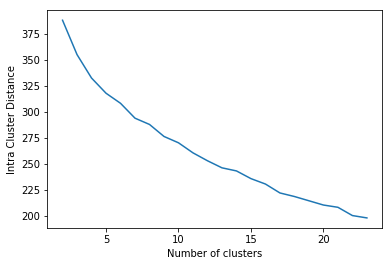

In [49]:
plt.close()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Intra Cluster Distance")
plt.show()

Odluka: 15 klastera.

In [50]:
kmeans = KMeans(n_clusters=15, max_iter=100).fit(df_components)
kmeans.predict(df_components)

array([ 6,  7,  7,  3,  7,  3,  4,  5,  9,  9, 12,  7, 12, 12,  2, 12,  9,
       10,  4,  1, 11, 11, 11,  5,  0, 13,  9,  0,  3,  3,  3,  3,  3, 10,
       10, 10,  6,  4,  6,  0,  0,  8,  5,  8,  8,  6,  5,  8, 13, 14, 14,
       13,  6,  9,  7,  7,  6, 14, 12, 13, 13,  4,  3, 13, 13,  1, 11,  6,
        8,  3,  7,  3,  3,  9,  0, 12, 12,  9, 11,  4,  4,  6, 10,  8,  2,
        0,  8,  8, 13, 14,  7, 10, 14, 10, 14, 12,  2, 10,  0,  5,  1,  1,
        5,  0,  9, 13, 10,  0,  8,  8,  1,  2,  8,  2,  8,  5,  3, 14,  5,
        5, 12, 14,  6,  6, 14,  2,  1,  1,  5,  2,  9,  2,  9,  1,  9,  5,
        2,  3,  2,  6,  1, 11,  6,  3,  1,  2,  8,  7,  9,  4,  3],
      dtype=int32)

In [51]:
centroids = pd.DataFrame(kmeans.cluster_centers_.transpose(), columns = [i for i in range(0, 15)])
centroids

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.040089,-1.200218,-0.278290,0.872392,0.362477,-0.655670,-0.202437,1.095303,-0.438659,-0.283767,-0.040912,-1.082408,0.030972,-0.336437,0.953649
1,0.447843,0.115039,0.019980,0.137232,0.633634,-0.386577,-0.713677,-0.948216,0.906800,-0.414483,-0.481704,-0.111140,0.952408,-0.430838,0.327686
2,0.773345,0.056996,0.076742,-0.404041,-0.116690,0.215515,-0.266507,0.236059,-0.103191,-0.259304,0.758107,0.204817,0.045225,-0.360793,-0.394726
3,0.135481,0.045461,-0.457887,-0.042751,0.649022,0.437460,0.568225,0.053537,0.469338,-0.594421,-0.364333,0.185701,-0.527783,-0.406759,-0.116039
4,-0.072641,-0.114398,-0.681046,-0.361157,0.025592,0.464328,-0.129424,0.292490,-0.071595,0.226474,-0.266775,0.635404,0.278682,-0.048759,0.341425
5,-0.106581,-0.241079,0.216782,-0.200725,-0.084656,-0.459126,0.236474,0.254392,0.326055,-0.132813,0.218182,0.419006,-0.137794,-0.085855,-0.066417
6,0.286411,0.172819,0.267170,-0.210063,0.402909,-0.030910,-0.014541,-0.170624,-0.247234,-0.133410,-0.374258,0.053826,-0.200916,0.489813,0.044022
7,-0.210792,-0.261993,-0.141020,-0.049933,0.384111,-0.054928,-0.032049,0.029731,0.065275,-0.003825,0.137421,0.131297,0.446894,0.159721,-0.381898
8,-0.133521,-0.094249,-0.205071,-0.208610,-0.105878,0.028412,-0.068164,-0.127474,0.076921,-0.241928,0.168260,-0.198033,-0.136369,0.722996,0.691148
9,-0.100539,-0.213456,0.146317,0.033632,-0.161688,0.027774,0.011953,-0.077626,0.088535,-0.141621,0.075498,0.115360,-0.065297,0.116718,0.113443


In [52]:
distances_df = pd.DataFrame(KMeans(n_clusters=15).fit_transform(df_components))
distances_df = distances_df.apply(np.min, axis=1)

In [53]:
distances_df[distances_df > distances_df.quantile(1-OUTLIERS_FRACTION)]

2      1.656764
8      1.539868
11     1.672189
15     1.576754
54     1.542610
57     1.644094
60     1.640674
78     1.533269
89     1.826875
91     1.655817
111    1.688052
117    1.661892
123    1.617375
144    1.539079
145    1.667224
dtype: float64

In [54]:
outliers_clustering_index = list(distances_df[distances_df > distances_df.quantile(1-OUTLIERS_FRACTION)].index)
outliers_clustering_index

[2, 8, 11, 15, 54, 57, 60, 78, 89, 91, 111, 117, 123, 144, 145]

S obzirom da je u pitanju metoda rađena nad novim osobinama, odlučeno je da ona kao član ansambla utiče binarno - odnosno, umesto verovatnoće da li je neki zapis izuzetak, ova metoda će učestvovati samom odlukom - nulom ili jedinicom.

In [55]:
result_df['clustering_outlier'] = result_df.index.isin(outliers_clustering_index).astype(int)
result_df.head()

,naspol,nasss,nastrs,nasvl,naslm,nasvp,nastk,nasmr,nasintr,nasintra,nasprir,nasfil,rodss,rodpol,rodvl,rodlm,rodvp,rodtk,rodmr,rodintr,rodintra,rodprir,rodfil,vrspol,vrsray,vrsvl,vrslm,vrsvp,vrstk,vrsmr,vrsintr,vrsintra,vrsprir,vrsfil,ucepol,ucenraz,ucevl,ucelm,ucevp,ucetk,ucemr,uceintr,uceintra,uceprir,ucefil,rpm,vs,shv,Rnasvl,knn_score,knn_proba,knn_outlier,abod_score,abod_proba,abod_outlier,clustering_outlier
0,0.0,1.0,0.5,0.333333,0.000,0.645833,0.632353,0.666667,0.555556,0.365854,0.183673,0.333333,0.0,0.0,0.361111,0.425532,0.717391,0.52,0.680851,0.705882,0.558140,0.288462,0.489796,0.0,1.0,0.432432,0.347826,0.500000,0.425532,0.595745,0.642857,0.754717,0.472727,0.620690,0.0,0.333333,0.205128,0.186047,0.60,0.396226,0.555556,0.212121,0.447368,0.351852,0.307692,0.76,0.722222,0.750000,0.060403,1.702833,0.336031,0,-0.005758,0.735140,0,0
1,0.0,1.0,0.5,0.487179,0.175,0.416667,0.544118,0.314815,0.666667,0.609756,0.306122,0.313725,0.0,1.0,0.277778,0.702128,0.500000,0.40,0.063830,0.843137,0.767442,0.442308,0.224490,0.0,1.0,0.216216,0.434783,0.477273,0.319149,0.297872,0.833333,0.811321,0.490909,0.344828,0.0,0.333333,0.230769,0.255814,0.42,0.301887,0.133333,0.696970,0.684211,0.425926,0.192308,1.00,0.666667,0.666667,0.194631,1.884296,0.394510,0,-0.006612,0.754482,0,0
2,0.0,1.0,0.5,0.282051,0.225,0.250000,0.558824,0.351852,0.577778,0.000000,0.204082,0.156863,0.0,0.0,0.138889,0.212766,0.000000,0.40,0.276596,0.509804,0.418605,0.269231,0.346939,0.0,1.0,0.162162,0.326087,0.204545,0.425532,0.361702,0.642857,0.849057,0.272727,0.327586,1.0,0.333333,0.000000,0.000000,0.00,0.283019,0.088889,0.090909,0.000000,0.148148,0.038462,1.00,0.722222,0.666667,0.033557,2.184789,0.797904,1,-0.001202,0.966105,1,1
3,0.0,1.0,0.0,0.487179,0.675,0.166667,0.338235,0.240741,0.355556,0.439024,0.489796,0.529412,0.0,0.0,0.444444,0.531915,0.500000,0.48,0.425532,0.490196,0.441860,0.673077,0.142857,1.0,0.0,0.459459,0.652174,0.522727,0.297872,0.574468,0.738095,0.867925,0.509091,0.637931,1.0,0.000000,0.410256,0.302326,0.46,0.641509,0.666667,0.090909,0.210526,0.555556,0.269231,0.80,0.666667,0.166667,0.194631,1.839305,0.522436,0,-0.001422,0.961047,0,0
4,0.0,1.0,0.0,0.384615,0.300,0.395833,0.823529,0.592593,0.466667,0.536585,0.326531,0.607843,0.0,1.0,0.111111,0.297872,0.369565,0.68,0.404255,0.666667,0.674419,0.365385,0.306122,0.0,0.0,0.351351,0.326087,0.272727,0.638298,0.489362,0.714286,0.679245,0.636364,0.413793,1.0,0.000000,0.461538,0.232558,0.26,0.622642,0.244444,0.303030,0.526316,0.555556,0.442308,0.88,0.277778,0.416667,0.093960,1.780840,0.356002,0,-0.004307,0.813175,0,0


#### 2.4. Identifikacija anomalija na osnovu izolovane šume (Isolation Forest)

Ansambli u službi otkrivanja anomalija. Ovo je prilagođena verzija algoritma Random Forest. Pravi slučajnu šumu stabala odlučivanja i kao anomaly_score posmatra koliko je obzervacija izolovana od ostalih (tako što meri sa još koliko drugih tačaka se našla u listu).

[Više o algoritmu](http://www.extended-cognition.com/2018/11/15/multivariate-outlier-detection-with-isolation-forests/) [Originalni Rad](https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/tkdd11.pdf)

[Python implementacija](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.iforest)

In [56]:
from pyod.models.iforest import IForest

In [57]:
forest_model = IForest(contamination=OUTLIERS_FRACTION, random_state=2019)

In [58]:
forest_model.fit(scaled_df)

result_df['forest_score'] = forest_model.decision_scores_
result_df['forest_proba'] = forest_model.predict_proba(scaled_df)[:,1]
result_df['forest_outlier'] = forest_model.predict(scaled_df)

In [59]:
result_df.query('forest_outlier == 1')

,naspol,nasss,nastrs,nasvl,naslm,nasvp,nastk,nasmr,nasintr,nasintra,nasprir,nasfil,rodss,rodpol,rodvl,rodlm,rodvp,rodtk,rodmr,rodintr,rodintra,rodprir,rodfil,vrspol,vrsray,vrsvl,vrslm,vrsvp,vrstk,vrsmr,vrsintr,vrsintra,vrsprir,vrsfil,ucepol,ucenraz,ucevl,ucelm,ucevp,ucetk,ucemr,uceintr,uceintra,uceprir,ucefil,rpm,vs,shv,Rnasvl,knn_score,knn_proba,knn_outlier,abod_score,abod_proba,abod_outlier,clustering_outlier,forest_score,forest_proba,forest_outlier
2,0.0,1.0,0.5,0.282051,0.225,0.250000,0.558824,0.351852,0.577778,0.000000,0.204082,0.156863,0.0,0.0,0.138889,0.212766,0.000000,0.40,0.276596,0.509804,0.418605,0.269231,0.346939,0.0,1.0,0.162162,0.326087,0.204545,0.425532,0.361702,0.642857,0.849057,0.272727,0.327586,1.0,0.333333,0.000000,0.000000,0.00,0.283019,0.088889,0.090909,0.000000,0.148148,0.038462,1.00,0.722222,0.666667,0.033557,2.184789,0.797904,1,-0.001202,0.966105,1,1,0.044972,1.000000,1
11,0.0,0.0,1.0,0.564103,0.375,0.541667,0.647059,0.500000,0.422222,0.365854,0.489796,0.509804,0.0,0.0,0.083333,0.000000,0.065217,0.08,0.255319,0.450980,0.302326,0.096154,0.020408,0.0,0.0,0.675676,0.391304,0.772727,0.446809,0.340426,0.571429,0.773585,0.654545,0.689655,0.0,0.000000,0.435897,0.302326,0.28,0.132075,0.222222,0.121212,0.394737,0.185185,0.211538,1.00,0.166667,0.250000,0.278523,2.342803,0.944502,1,-0.000203,0.997918,1,1,0.044223,0.994651,1
15,0.0,0.5,0.5,0.769231,0.950,0.645833,0.955882,0.666667,1.000000,0.853659,0.693878,0.764706,1.0,1.0,0.250000,0.595745,0.673913,0.46,0.425532,0.745098,0.627907,0.461538,0.693878,1.0,0.0,0.972973,1.000000,0.977273,0.893617,0.957447,1.000000,1.000000,0.963636,0.931034,1.0,0.000000,0.974359,1.000000,1.00,1.000000,0.955556,1.000000,0.973684,0.944444,0.942308,0.92,0.500000,0.250000,0.651007,1.935124,0.602688,0,-0.001995,0.940471,0,1,0.005761,0.720198,1
31,0.0,1.0,0.5,0.846154,0.900,0.958333,1.000000,0.851852,1.000000,0.853659,0.938776,0.921569,0.0,0.0,0.250000,0.319149,0.347826,0.84,0.595745,0.607843,0.465116,0.288462,0.224490,0.0,0.0,0.000000,0.282609,0.090909,0.085106,0.531915,0.000000,0.339623,0.509091,0.310345,0.0,0.000000,0.230769,0.139535,0.38,0.849057,0.555556,0.393939,0.394737,0.203704,0.192308,0.84,0.722222,0.833333,0.812081,2.034240,0.657813,0,-0.001924,0.949562,0,0,0.023573,0.847300,1
39,0.0,1.0,0.5,0.435897,0.625,0.729167,0.794118,0.481481,0.377778,0.097561,0.081633,0.137255,1.0,1.0,0.250000,0.659574,0.543478,0.62,0.361702,0.450980,0.255814,0.115385,0.183673,1.0,1.0,0.324324,0.347826,0.204545,0.361702,0.297872,0.357143,0.415094,0.309091,0.431034,1.0,0.333333,0.230769,0.697674,0.62,0.509434,0.311111,0.303030,0.210526,0.074074,0.000000,0.96,0.777778,0.666667,0.147651,2.062535,0.690478,0,-0.001916,0.910194,0,0,0.009629,0.747800,1
40,0.0,1.0,0.5,0.358974,0.350,0.479167,0.867647,0.296296,0.488889,0.292683,0.265306,0.333333,1.0,1.0,0.250000,0.425532,0.413043,0.74,0.255319,0.431373,0.348837,0.250000,0.367347,1.0,1.0,0.351351,0.391304,0.454545,0.808511,0.382979,0.690476,0.849057,0.509091,0.568966,1.0,0.333333,0.205128,0.046512,0.14,0.641509,0.133333,0.000000,0.421053,0.314815,0.230769,0.96,0.722222,0.416667,0.073826,1.985295,0.637717,0,-0.003581,0.849476,0,0,0.003921,0.707070,1
54,0.0,1.0,1.0,0.461538,0.050,0.687500,0.558824,0.592593,0.711111,0.707317,0.489796,0.313725,0.0,1.0,0.722222,0.702128,0.391304,0.00,0.468085,0.901961,0.953488,0.846154,0.591837,0.0,0.0,0.594595,0.304348,0.454545,0.212766,0.425532,0.690476,0.754717,0.272727,0.431034,1.0,0.000000,0.564103,0.302326,0.08,0.000000,0.333333,0.484848,0.605263,0.537037,0.134615,0.96,0.500000,0.166667,0.171141,2.105556,0.771637,1,-0.000351,0.997615,1,1,0.011890,0.763938,1
62,0.0,1.0,0.0,0.743590,0.725,0.562500,0.750000,1.000000,0.777778,0.902439,0.755102,0.745098,0.0,0.0,0.750000,0.723404,0.630435,0.60,0.978723,0.960784,0.930233,0.384615,0.653061,1.0,1.0,0.189189,0.152174,0.022727,0.340426,0.319149,0.452381,0.584906,0.200000,0.568966,1.0,0.333333,0.666667,0.325581,0.56,0.698113,0.911111,0.757576,0.763158,0.444444,0.000000,0.40,0.333333,0.583333,0

#### 2.5. Identifikacija anomalija zasnovana na neuronskim mrežama (Autoencoders)

Slično kao ranije korišćena PCA analiza, autoenkoderi su metod koji se koristi za učenje boljih reprezentacija podataka na nenadgledan način. Ovaj tip neuronske mreže može se koristiti za otkrivanje izuzetaka tako što bi nakon naučenih reprezentacija računali grešku u rekonstrukciji pravih vrednosti podataka. Što je veća greška, to sa većom sigurnošću možemo smatrati da je ta obzervacija zapravo izuzetak. U paketu PyOD postoji implementiran ovaj metod, a za detaljniji uvid u metod, može se koristiti odeljak [Outliers Analysis iz knjige Data Mining](https://link.springer.com/chapter/10.1007/978-3-319-14142-8_8).

In [60]:
from pyod.models import auto_encoder
autoencoder = auto_encoder.AutoEncoder(hidden_neurons=[64,32,32,64])
autoencoder.fit(scaled_df)

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 49)                2450      
_________________________________________________________________
dropout_1 (Dropout)          (None, 49)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 49)                2450      
_________________________________________________________________
dropout_2 (Dropout)          (None, 49)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                3200      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
__________

Epoch 59/100
135/135 [==============================] - 0s 78us/step - loss: 13.1208 - val_loss: 10.4865
Epoch 60/100
135/135 [==============================] - 0s 98us/step - loss: 12.8452 - val_loss: 10.3158
Epoch 61/100
135/135 [==============================] - 0s 82us/step - loss: 12.6323 - val_loss: 10.1437
Epoch 62/100
135/135 [==============================] - 0s 89us/step - loss: 12.4156 - val_loss: 9.9769
Epoch 63/100
135/135 [==============================] - 0s 66us/step - loss: 12.1179 - val_loss: 9.8167
Epoch 64/100
135/135 [==============================] - 0s 77us/step - loss: 11.8726 - val_loss: 9.6618
Epoch 65/100
135/135 [==============================] - 0s 71us/step - loss: 11.6584 - val_loss: 9.5069
Epoch 66/100
135/135 [==============================] - 0s 70us/step - loss: 11.5539 - val_loss: 9.3618
Epoch 67/100
135/135 [==============================] - 0s 65us/step - loss: 11.2317 - val_loss: 9.2202
Epoch 68/100
135/135 [==============================] - 0s 76

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[64, 32, 32, 64],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7fc87d1fc620>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [61]:
result_df['autoencoder_score'] = autoencoder.decision_scores_
result_df['autoencoder_proba'] = autoencoder.predict_proba(scaled_df)[:,1]
result_df['autoencoder_outlier'] = autoencoder.predict(scaled_df)

In [62]:
result_df.query('autoencoder_outlier == 1')

,naspol,nasss,nastrs,nasvl,naslm,nasvp,nastk,nasmr,nasintr,nasintra,nasprir,nasfil,rodss,rodpol,rodvl,rodlm,rodvp,rodtk,rodmr,rodintr,rodintra,rodprir,rodfil,vrspol,vrsray,vrsvl,vrslm,vrsvp,vrstk,vrsmr,...,vrsprir,vrsfil,ucepol,ucenraz,ucevl,ucelm,ucevp,ucetk,ucemr,uceintr,uceintra,uceprir,ucefil,rpm,vs,shv,Rnasvl,knn_score,knn_proba,knn_outlier,abod_score,abod_proba,abod_outlier,clustering_outlier,forest_score,forest_proba,forest_outlier,autoencoder_score,autoencoder_proba,autoencoder_outlier
2,0.0,1.0,0.5,0.282051,0.225,0.250000,0.558824,0.351852,0.577778,0.000000,0.204082,0.156863,0.0,0.0,0.138889,0.212766,0.000000,0.40,0.276596,0.509804,0.418605,0.269231,0.346939,0.0,1.0,0.162162,0.326087,0.204545,0.425532,0.361702,...,0.272727,0.327586,1.0,0.333333,0.000000,0.000000,0.00,0.283019,0.088889,0.090909,0.000000,0.148148,0.038462,1.00,0.722222,0.666667,0.033557,2.184789,0.797904,1,-0.001202,0.966105,1,1,0.044972,1.000000,1,12.642850,1.000000,1
5,0.0,1.0,0.0,0.384615,0.550,0.395833,0.661765,0.277778,0.333333,0.341463,0.408163,0.274510,0.0,0.0,0.083333,0.468085,0.282609,0.58,0.404255,0.509804,0.279070,0.000000,0.204082,1.0,0.0,0.297297,0.413043,0.409091,0.829787,0.446809,...,0.490909,0.551724,1.0,0.000000,0.384615,0.488372,0.56,0.849057,0.177778,0.272727,0.368421,0.555556,0.557692,0.88,0.222222,0.166667,0.093960,1.806730,0.468315,0,-0.001240,0.947780,0,0,-0.023088,0.514341,0,8.887305,0.547378,1
11,0.0,0.0,1.0,0.564103,0.375,0.541667,0.647059,0.500000,0.422222,0.365854,0.489796,0.509804,0.0,0.0,0.083333,0.000000,0.065217,0.08,0.255319,0.450980,0.302326,0.096154,0.020408,0.0,0.0,0.675676,0.391304,0.772727,0.446809,0.340426,...,0.654545,0.689655,0.0,0.000000,0.435897,0.302326,0.28,0.132075,0.222222,0.121212,0.394737,0.185185,0.211538,1.00,0.166667,0.250000,0.278523,2.342803,0.944502,1,-0.000203,0.997918,1,1,0.044223,0.994651,1,11.741393,0.891356,1
31,0.0,1.0,0.5,0.846154,0.900,0.958333,1.000000,0.851852,1.000000,0.853659,0.938776,0.921569,0.0,0.0,0.250000,0.319149,0.347826,0.84,0.595745,0.607843,0.465116,0.288462,0.224490,0.0,0.0,0.000000,0.282609,0.090909,0.085106,0.531915,...,0.509091,0.310345,0.0,0.000000,0.230769,0.139535,0.38,0.849057,0.555556,0.393939,0.394737,0.203704,0.192308,0.84,0.722222,0.833333,0.812081,2.034240,0.657813,0,-0.001924,0.949562,0,0,0.023573,0.847300,1,10.033767,0.685551,1
39,0.0,1.0,0.5,0.435897,0.625,0.729167,0.794118,0.481481,0.377778,0.097561,0.081633,0.137255,1.0,1.0,0.250000,0.659574,0.543478,0.62,0.361702,0.450980,0.255814,0.115385,0.183673,1.0,1.0,0.324324,0.347826,0.204545,0.361702,0.297872,...,0.309091,0.431034,1.0,0.333333,0.230769,0.697674,0.62,0.509434,0.311111,0.303030,0.210526,0.074074,0.000000,0.96,0.777778,0.666667,0.147651,2.062535,0.690478,0,-0.001916,0.910194,0,0,0.009629,0.747800,1,9.996289,0.681034,1
40,0.0,1.0,0.5,0.358974,0.350,0.479167,0.867647,0.296296,0.488889,0.292683,0.265306,0.333333,1.0,1.0,0.250000,0.425532,0.413043,0.74,0.255319,0.431373,0.348837,0.250000,0.367347,1.0,1.0,0.351351,0.391304,0.454545,0.808511,0.382979,...,0.509091,0.568966,1.0,0.333333,0.205128,0.046512,0.14,0.641509,0.133333,0.000000,0.421053,0.314815,0.230769,0.96,0.722222,0.416667,0.073826,1.985295,0.637717,0,-0.003581,0.849476,0,0,0.003921,0.707070,1,9.343435,0.602352,1
54,0.0,1.0,1.0,0.461538,0.050,0.687500,0.558824,0.592593,0.711111,0.707317,0.489796,0.313725,0.0,1.0,0.722222,0.702128,0.391304,0.00,0.468085,0.901961,0.953488,0.846154,0.591837,0.0,0.0,0.594595,0.304348,0.454545,0.212766,0.425532,...,0.272727,0.431034,1.0,0.000000,0.564103,0.302326,0.08,0.000000,0.333333,0.484848,0.605263,0.537037,0.134615,0.96,0.500000,0.166667,0.171141,2.105556,0.771637,1,-0.000351,0.997615,1,1,0.011890,0.763938,1,9.371967,0.605790,1
57,1.0,1.0,0.0,0.410256,0.675,0.875000,0.661765,0.351852,0.600000,0.756098,0.530612,0.333333,0.0,1.0,0.416667,0.510638,0.369565,0.70,0.468085,0.647059,0.558140,0.615385,0.591837,1.0,1.0,0.054054,0.043478,0.136364,0.148936,0.000000,...,0.000000,0.413793,1.0,0.333333,0.538462,0.581395,0.50,0.67

### Sumiranje odluka algoritama

In [63]:
result_df = add_summary_columns(result_df)

In [64]:
result_df['ensamble_outlier'] = result_df['knn_proba'] + result_df['knn_proba'] + result_df['abod_proba'] + \
                                result_df['clustering_outlier'] + result_df['forest_proba'] +  result_df['autoencoder_proba']

In [65]:
result_df.sort_values('ensamble_outlier', ascending=False)

,naspol,nasss,nastrs,nasvl,naslm,nasvp,nastk,nasmr,nasintr,nasintra,nasprir,nasfil,rodss,rodpol,rodvl,rodlm,rodvp,rodtk,rodmr,rodintr,rodintra,rodprir,rodfil,vrspol,vrsray,vrsvl,vrslm,vrsvp,vrstk,vrsmr,...,ucelm,ucevp,ucetk,ucemr,uceintr,uceintra,uceprir,ucefil,rpm,vs,shv,Rnasvl,knn_score,knn_proba,knn_outlier,abod_score,abod_proba,abod_outlier,clustering_outlier,forest_score,forest_proba,forest_outlier,autoencoder_score,autoencoder_proba,autoencoder_outlier,nas_sum,rod_sum,vr_sum,uce_sum,ensamble_outlier
11,0.0,0.0,1.0,0.564103,0.375,0.541667,0.647059,0.500000,0.422222,0.365854,0.489796,0.509804,0.0,0.0,0.083333,0.000000,0.065217,0.08,0.255319,0.450980,0.302326,0.096154,0.020408,0.0,0.0,0.675676,0.391304,0.772727,0.446809,0.340426,...,0.302326,0.28,0.132075,0.222222,0.121212,0.394737,0.185185,0.211538,1.00,0.166667,0.250000,0.278523,2.342803,0.944502,1,-0.000203,0.997918,1,1,0.044223,0.994651,1,11.741393,0.891356,1,4.415504,1.353738,5.316155,2.285193,5.772929
2,0.0,1.0,0.5,0.282051,0.225,0.250000,0.558824,0.351852,0.577778,0.000000,0.204082,0.156863,0.0,0.0,0.138889,0.212766,0.000000,0.40,0.276596,0.509804,0.418605,0.269231,0.346939,0.0,1.0,0.162162,0.326087,0.204545,0.425532,0.361702,...,0.000000,0.00,0.283019,0.088889,0.090909,0.000000,0.148148,0.038462,1.00,0.722222,0.666667,0.033557,2.184789,0.797904,1,-0.001202,0.966105,1,1,0.044972,1.000000,1,12.642850,1.000000,1,2.606449,2.572829,3.572256,0.649427,5.561913
89,1.0,1.0,0.0,0.282051,0.550,0.000000,0.514706,0.574074,0.000000,0.268293,0.081633,0.000000,0.0,1.0,0.138889,0.489362,0.391304,0.64,0.659574,0.568627,0.511628,0.500000,0.448980,1.0,0.0,0.675676,0.565217,0.477273,0.574468,0.595745,...,0.883721,0.72,0.943396,0.688889,1.000000,1.000000,0.796296,1.000000,0.68,0.111111,0.250000,0.033557,2.163897,0.813002,1,-0.000741,0.985415,1,1,0.014558,0.782972,1,10.493721,0.740985,1,2.270757,4.348364,4.639715,8.032302,5.135376
54,0.0,1.0,1.0,0.461538,0.050,0.687500,0.558824,0.592593,0.711111,0.707317,0.489796,0.313725,0.0,1.0,0.722222,0.702128,0.391304,0.00,0.468085,0.901961,0.953488,0.846154,0.591837,0.0,0.0,0.594595,0.304348,0.454545,0.212766,0.425532,...,0.302326,0.08,0.000000,0.333333,0.484848,0.605263,0.537037,0.134615,0.96,0.500000,0.166667,0.171141,2.105556,0.771637,1,-0.000351,0.997615,1,1,0.011890,0.763938,1,9.371967,0.605790,1,4.572404,5.577179,4.140741,3.041526,4.910617
91,0.0,0.5,1.0,0.487179,0.050,0.541667,0.779412,0.537037,0.733333,0.609756,0.612245,0.333333,1.0,1.0,0.472222,0.425532,0.565217,0.88,0.617021,0.803922,0.790698,0.788462,0.428571,0.0,0.0,0.729730,0.782609,0.522727,0.531915,0.553191,...,0.953488,0.98,0.943396,0.755556,0.909091,0.868421,0.925926,0.980769,0.04,0.111111,0.250000,0.194631,2.192756,0.751898,1,-0.001555,0.966011,1,1,0.015928,0.792749,1,9.109487,0.574156,1,4.683963,5.771645,6.296415,8.239724,4.836713
57,1.0,1.0,0.0,0.410256,0.675,0.875000,0.661765,0.351852,0.600000,0.756098,0.530612,0.333333,0.0,1.0,0.416667,0.510638,0.369565,0.70,0.468085,0.647059,0.558140,0.615385,0.591837,1.0,1.0,0.054054,0.043478,0.136364,0.148936,0.000000,...,0.581395,0.50,0.679245,0.311111,0.030303,0.473684,0.444444,0.557692,0.76,0.277778,0.250000,0.120805,2.146629,0.779031,1,-0.000879,0.972473,1,1,-0.003450,0.654472,0,9.252663,0.591412,1,5.193916,4.877375,1.407137,4.116337,4.776418
117,1.0,0.5,1.0,0.435897,0.125,0.479167,0.705882,0.444444,0.733333,0.756098,0.285714,0.431373,0.0,0.0,0.555556,0.617021,0.934783,0.86,0.255319,0.882353,0.767442,0.230769,0.367347,1.0,0.0,0.567568,0.326087,0.318182,0.595745,0.744681,...,0.232558,0.40,0.547170,0.222222,0.212121,0.657895,0.444444,0.384615,0.80,0.500000,0.166667,0.147651,2.068190,0.705519,0,-0.002021,0.953156,0,1,-0.007283,0.627121,0,7.874158,0.425273,0,4.396909,5.470590,5.384915,3.434359,4.416588
15,0.0,0.5,0.5,0.769231,0.950,0.645833,0.955882,0.666667,1.000000,0.853659,0.693878,0.764706,1.0,1.0,0.250000,0.595745,0.673913,0.46,0.425532,0.745098,0.627907,0.461538,0.693878,1.0,0.0,0.972973,1.000000,0.977273,0.893617,0.957447,...,1.000000

Na kraju dobijamo sumarne rezultate našeg prilagođenog ansambla algoritma koga čine 6 multivarijanta algoritma različitih pristupa. S obzirom da se ocena kreće od 0 do 6, odlučujemo se da prag anomalije (outlier threshold) postavimo na 4.5, odnosno dozvoljavamo relaksaciju od 25% pri donošenju odluke (potrebno nam je 75% ukupnih glasova). 

In [66]:
result_df.sort_values('ensamble_outlier', ascending=False, inplace=True)
result_df.query('ensamble_outlier > 4.5')

,naspol,nasss,nastrs,nasvl,naslm,nasvp,nastk,nasmr,nasintr,nasintra,nasprir,nasfil,rodss,rodpol,rodvl,rodlm,rodvp,rodtk,rodmr,rodintr,rodintra,rodprir,rodfil,vrspol,vrsray,vrsvl,vrslm,vrsvp,vrstk,vrsmr,...,ucelm,ucevp,ucetk,ucemr,uceintr,uceintra,uceprir,ucefil,rpm,vs,shv,Rnasvl,knn_score,knn_proba,knn_outlier,abod_score,abod_proba,abod_outlier,clustering_outlier,forest_score,forest_proba,forest_outlier,autoencoder_score,autoencoder_proba,autoencoder_outlier,nas_sum,rod_sum,vr_sum,uce_sum,ensamble_outlier
11,0.0,0.0,1.0,0.564103,0.375,0.541667,0.647059,0.500000,0.422222,0.365854,0.489796,0.509804,0.0,0.0,0.083333,0.000000,0.065217,0.08,0.255319,0.450980,0.302326,0.096154,0.020408,0.0,0.0,0.675676,0.391304,0.772727,0.446809,0.340426,...,0.302326,0.28,0.132075,0.222222,0.121212,0.394737,0.185185,0.211538,1.00,0.166667,0.250000,0.278523,2.342803,0.944502,1,-0.000203,0.997918,1,1,0.044223,0.994651,1,11.741393,0.891356,1,4.415504,1.353738,5.316155,2.285193,5.772929
2,0.0,1.0,0.5,0.282051,0.225,0.250000,0.558824,0.351852,0.577778,0.000000,0.204082,0.156863,0.0,0.0,0.138889,0.212766,0.000000,0.40,0.276596,0.509804,0.418605,0.269231,0.346939,0.0,1.0,0.162162,0.326087,0.204545,0.425532,0.361702,...,0.000000,0.00,0.283019,0.088889,0.090909,0.000000,0.148148,0.038462,1.00,0.722222,0.666667,0.033557,2.184789,0.797904,1,-0.001202,0.966105,1,1,0.044972,1.000000,1,12.642850,1.000000,1,2.606449,2.572829,3.572256,0.649427,5.561913
89,1.0,1.0,0.0,0.282051,0.550,0.000000,0.514706,0.574074,0.000000,0.268293,0.081633,0.000000,0.0,1.0,0.138889,0.489362,0.391304,0.64,0.659574,0.568627,0.511628,0.500000,0.448980,1.0,0.0,0.675676,0.565217,0.477273,0.574468,0.595745,...,0.883721,0.72,0.943396,0.688889,1.000000,1.000000,0.796296,1.000000,0.68,0.111111,0.250000,0.033557,2.163897,0.813002,1,-0.000741,0.985415,1,1,0.014558,0.782972,1,10.493721,0.740985,1,2.270757,4.348364,4.639715,8.032302,5.135376
54,0.0,1.0,1.0,0.461538,0.050,0.687500,0.558824,0.592593,0.711111,0.707317,0.489796,0.313725,0.0,1.0,0.722222,0.702128,0.391304,0.00,0.468085,0.901961,0.953488,0.846154,0.591837,0.0,0.0,0.594595,0.304348,0.454545,0.212766,0.425532,...,0.302326,0.08,0.000000,0.333333,0.484848,0.605263,0.537037,0.134615,0.96,0.500000,0.166667,0.171141,2.105556,0.771637,1,-0.000351,0.997615,1,1,0.011890,0.763938,1,9.371967,0.605790,1,4.572404,5.577179,4.140741,3.041526,4.910617
91,0.0,0.5,1.0,0.487179,0.050,0.541667,0.779412,0.537037,0.733333,0.609756,0.612245,0.333333,1.0,1.0,0.472222,0.425532,0.565217,0.88,0.617021,0.803922,0.790698,0.788462,0.428571,0.0,0.0,0.729730,0.782609,0.522727,0.531915,0.553191,...,0.953488,0.98,0.943396,0.755556,0.909091,0.868421,0.925926,0.980769,0.04,0.111111,0.250000,0.194631,2.192756,0.751898,1,-0.001555,0.966011,1,1,0.015928,0.792749,1,9.109487,0.574156,1,4.683963,5.771645,6.296415,8.239724,4.836713
57,1.0,1.0,0.0,0.410256,0.675,0.875000,0.661765,0.351852,0.600000,0.756098,0.530612,0.333333,0.0,1.0,0.416667,0.510638,0.369565,0.70,0.468085,0.647059,0.558140,0.615385,0.591837,1.0,1.0,0.054054,0.043478,0.136364,0.148936,0.000000,...,0.581395,0.50,0.679245,0.311111,0.030303,0.473684,0.444444,0.557692,0.76,0.277778,0.250000,0.120805,2.146629,0.779031,1,-0.000879,0.972473,1,1,-0.003450,0.654472,0,9.252663,0.591412,1,5.193916,4.877375,1.407137,4.116337,4.776418


In [67]:
result_df.to_csv('data/dataset_with_anomaly_scores.csv')

Primetimo da smo dobili čak 4 ista izuzetka identifikovana još univarijantnim metodama (11,2,54,89).

In [68]:
result_df[result_df.index.isin([57,91])][['nas_sum', 'uce_sum', 'vr_sum', 'rod_sum', 'vs', 'shv']]

,nas_sum,uce_sum,vr_sum,rod_sum,vs,shv
91,4.683963,8.239724,6.296415,5.771645,0.111111,0.25
57,5.193916,4.116337,1.407137,4.877375,0.277778,0.25


`Učenik 91` znatno se odvaja od ostalih iz dataseta po tome što on sebe jako visoko procenjuje, dok ga i vršnjaci vide kao generalno dobrog. Ipak, nastavnik i roditelj ga procenjuju dosta niže, što se slaže sa rezultatima testova.

`Učenik 57` se znatno izdvaja po tome što je jedinstveni primer da se jedna grupa ocenjivača znatno izdvaja od ostalih u negativnom smislu. Vršnjaci ovog učenika veoma nisko ocenjuju, dok je najveća ocena nastavnika. Na testovima nije pokazao dobre rezultate. 

## Zaključak analize izuzetaka

Iz sprovedene analize može se veoma dobro pratiti priroda ocene različitih grupa ocenjivača i porediti sa rezultatima testova koji postoje. Ipak, s obzirom da su testovi merili samo grupu osobina i sprovedeni su samo jednom, može se sumnjati u njihovu relevantnost, pa je bolje pristupiti ovom problemu kao nenadgledanom. 

Najveći značaj ove analize vidi se  u tumačenju jaza (eng *gap*) između različitih ocenjivača koji definitivno postoji u obrazovanju i na kome bi trebalo raditi uz veću transparentnost procesa obrazovanja. 

Procena darovitosti na osnovu ocena razlitih grupa ocenjivača ne može se smatrati egzaktna, s obzirom da se videlo da su najbolji rezultati postignuti na testovima upravo kada se ocenjivači nisu složili oko ocena. Iako analizu jaza smatram korisnijom, može se reći da su postignuti zadovoljavajući rezultati i u analizi darovitosti. Identifikovana su neka pravila koja se mogu koristiti u proceni, poput onoga da učenici koji sebe samoprocenjuju skromnije, a ostale grupe procenjivača se slažu da su oni jako dobri u konkretnim osobinama kao i sumarno, obično postižu dobre rezultate. Takođe, postoje i druga pravila koja se pominju u izveštaju, ali je bitno napomenuti da nije preporučljivo njih posmatrati kao opšte istine, odvojeno od opisa korišćenog metoda (algoritma) i statistika na kojima se zasnivaju.